# Task-8 Gradient Descent
# Name-Neduri Hema Mounika
# Redg id-SIRSS1208

# Gradient Descent :
        Gradient Descent is the process of minimizing a function by following the gradients of the cost function

# Cost Function:
        J(θ0,θ1)=(1/2m)∑i=1m(hθ(xi)−yi)2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class LinearRegression:
    def __init__(self,print_cost=True):
        self.learning_rate = 0.01
        self.print_cost = print_cost
        
    def y_pred(self,X,w):
        return np.dot(w.T,X)
    #dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    def cost(self, yhat, y):
        C = 1 / self.m * np.sum(np.power(yhat - y, 2))
        #Calculating Mean square error
        return C
    
    def gradient_descent(self, w, X, y, yhat):
        gd = 2 / self.m * np.dot(X, (yhat - y).T)
        w = w - self.learning_rate * gd
        return w
    
    def main(self, X, y,total_iterations,k):
        # Add x1 = 1
        ones = np.ones((1, X.shape[1]))
        X = np.append(ones, X, axis=0)
        costs=[]

        self.m = X.shape[1]
        self.n = X.shape[0]

        w = np.zeros((self.n, 1))

        for it in range(total_iterations + 1):
            yhat = self.y_pred(X, w)
            cost = self.cost(yhat, y)
            costs.append(cost)
            if it % k == 0 and self.print_cost:
                print(f"Cost at iteration {it} is {cost}")
                
            w = self.gradient_descent(w, X, y, yhat)
            
        print('Slope:',w[1,0])
        print('Intercept:',w[0,0])
        return (w,costs)

# Training model on ndarray

In [4]:
if __name__ == "__main__":
    X = np.random.rand(1, 500)
    y = 3 * X + 5 + np.random.randn(1, 500) * 0.1
    regression = LinearRegression()
    w,c = regression.main(X,y,1000,100) #c for costs

Cost at iteration 0 is 43.37486702914689
Cost at iteration 100 is 0.25975762706404193
Cost at iteration 200 is 0.01472647928270109
Cost at iteration 300 is 0.012640158585426761
Cost at iteration 400 is 0.012105259649086651
Cost at iteration 500 is 0.011710826919590661
Cost at iteration 600 is 0.011415722208929993
Cost at iteration 700 is 0.011194907816234374
Cost at iteration 800 is 0.011029681592898332
Cost at iteration 900 is 0.010906049683231918
Cost at iteration 1000 is 0.010813541068195612
Slope: 2.970595048222954
Intercept: 5.017170872218498


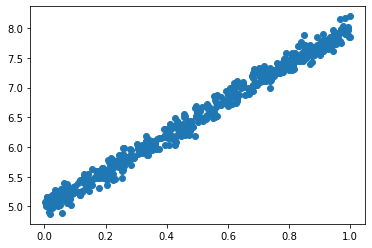

In [5]:
plt.scatter(X,y)

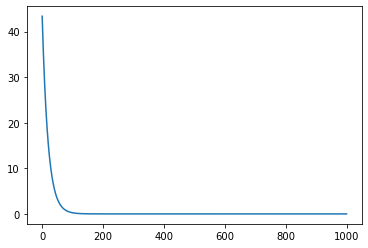

In [6]:
plt.plot(c)

# Training model on data set

In [7]:
data=pd.read_csv("file:///C:/Users/prasad/Desktop/Machine%20Learning/ML%20ClassNotes/Salary_Data.csv")

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data.duplicated().sum()

0

In [10]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,:-1].values

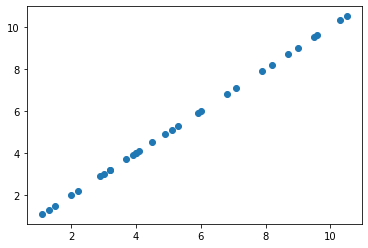

In [11]:
plt.scatter(X,Y)

In [12]:
result,c=regression.main(X,Y,20,2)

Cost at iteration 0 is 1080.5
Cost at iteration 2 is 195713905.3534236
Cost at iteration 4 is 35450192270882.79
Cost at iteration 6 is 6.421189796264901e+18
Cost at iteration 8 is 1.1630875817145377e+24
Cost at iteration 10 is 2.1067321877410586e+29
Cost at iteration 12 is 3.8159813419395143e+34
Cost at iteration 14 is 6.911990848558821e+39
Cost at iteration 16 is 1.2519877119283401e+45
Cost at iteration 18 is 2.2677594128273255e+50
Cost at iteration 20 is 4.107654336755416e+55
Slope: 4.500312105301212e+24
Intercept: 4.0911928230011015e+24


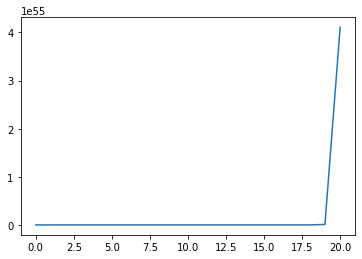

In [13]:
plt.plot(c)